# Face detection using OpenCV
One older (from around 2001), but still popular scheme for face detection is a Haar cascade classifier; these classifiers in the OpenCV library and use feature-based classification cascades that learn to isolate and detect faces in an image. You can read the original [paper](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) proposing this approach.

Let's see how face detection works on an exampe in this notebook.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

%matplotlib inline

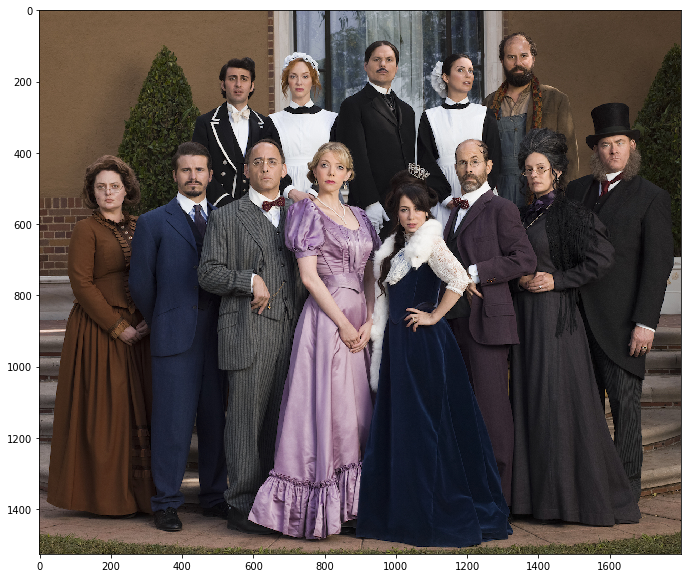

In [5]:
img_faces = cv.imread('images/multi_faces.jpg', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_faces, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12, 10))
plt.imshow(img_rgb)
plt.show()

Next we load in the fully trained architecture of the face detector, found in the file `haar cascades/ haarcascade_frontalface_default.xml`, and use it on our image to find faces.

## A note on parameters

How many faces are detected is determined by the function, `detectMultiScale` which aims to detect faces of varying sizes. The inputs to this function are: 

- image, 
- scaleFactor, 
- minNeighbors; 

you will often detect more faces with a smaller `scaleFactor`, and lower value for `minNeighbors`, but raising these values often produces better matches. Modify these values depending on your input image.

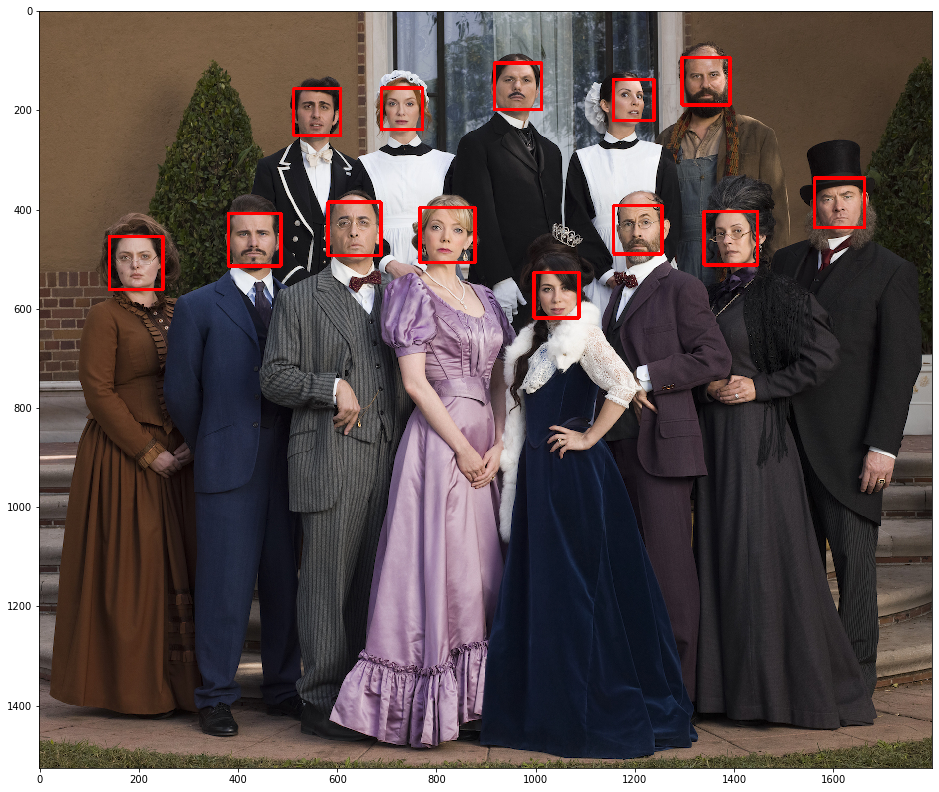

In [24]:
img_gray = cv.cvtColor(img_faces, cv.COLOR_BGR2GRAY)

img_derected = np.copy(img_rgb)

face_cascade = cv.CascadeClassifier('haar-cascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.2, minNeighbors=10)

if faces is not None:
    for [x, y, w, h] in faces:
        cv.rectangle(img_derected, (x, y), (x + w, y + h), (255, 0, 0), 5)

plt.figure(figsize=(16, 14))
plt.imshow(img_derected)
plt.show()

width 66 and height 111


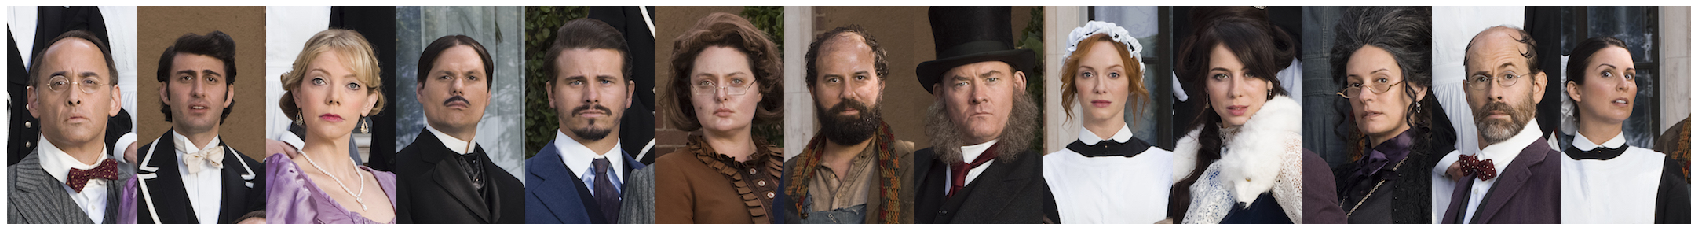

In [58]:
wmax = int(faces[:,2].max() * 0.6)
hmax = int(faces[:,3].max())

print(f'width {wmax} and height {hmax}')

roi_faces = np.array([
    img_rgb[y-hmax//2:y+2*hmax,x-wmax//2:x+2*wmax] for [x, y, w, h] in faces
])
np.random.shuffle(roi_faces)
portraits = np.hstack(roi_faces)

plt.figure(figsize=(40, 4))
plt.axis('off')
plt.imshow(portraits)
plt.show()